### Testing the links between thread and embarasingly parallel

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

[1, 0.9999847412109375, 0.9999542240984738, 0.9999084498267408, 0.9998474202582699, 0.9997711379538679, 0.999679606172439, 0.9995728288707544, 0.9994508107031677, 0.9993135570212779, 0.999161073873539, 0.9989933680048163]


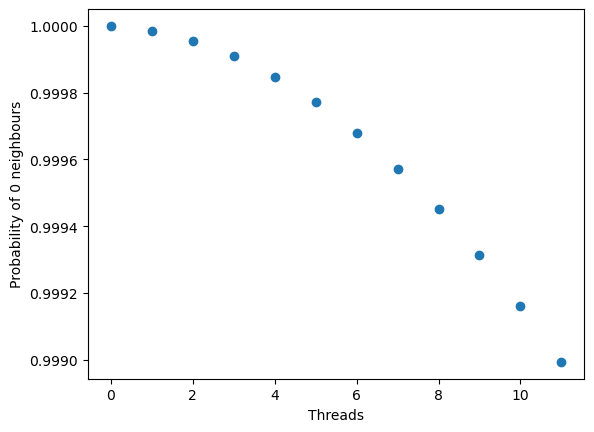

In [34]:
L = 512 # lattice size length
threads = 12

prob_touch_array = []
prob_ntouch_array = []
cum_prob_array = []

for i in range(threads):
    sites = L * L

    prob_touch = i*4/sites
    prob_touch_array.append(prob_touch)

    prob_ntouch = 1 - prob_touch
    prob_ntouch_array.append(prob_ntouch)

    if i == 0:
        cum_prob = 1
        cum_prob_array.append(cum_prob)
    else:
        cum_prob = prob_ntouch * cum_prob_array[i-1]
        cum_prob_array.append(cum_prob)


plt.scatter(range(threads),cum_prob_array, label='touch')
plt.xlabel('Threads')
plt.ylabel('Probability of 0 neighbours')
print(cum_prob_array)

This is an exponential decay

[1, 1.0, 0.9989933680048163, 0.9979877493176064, 0.9969831429183419, 0.9959795477880214, 0.9949769629086694, 0.9939753872633349, 0.9929748198360905, 0.9919752596120317, 0.9909767055772757, 0.9899791567189599, 0.9889826120252415, 0.9879870704852965, 0.9869925310893183, 0.9859989928285164, 0.9850064546951164, 0.9840149156823578, 0.983024374784494, 0.9820348309967905, 0.9810462833155242, 0.9800587307379828, 0.9790721722624628, 0.9780866068882694, 0.977102033615715, 0.9761184514461184, 0.9751358593818036, 0.9741542564260989, 0.9731736415833361, 0.9721940138588488, 0.9712153722589725, 0.9702377157910423, 0.9692610434633931, 0.9682853542853578, 0.9673106472672663, 0.9663369214204452, 0.9653641757572161, 0.9643924092908948, 0.9634216210357902, 0.9624518100072039, 0.9614829752214282, 0.9605151156957459, 0.959548230448429, 0.9585823184987377, 0.9576173788669194, 0.956653410574208, 0.9556904126428225, 0.9547283840959659, 0.9537673239578249, 0.9528072312535683, 0.951848105009346, 0.95088994425228

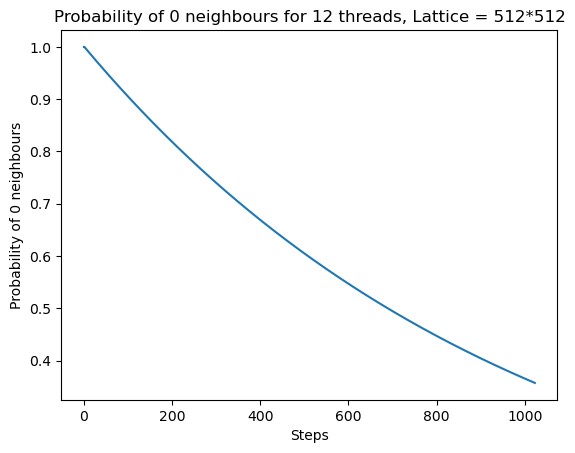

In [47]:
steps = 1024
prob_initial = cum_prob_array[-1]

probs = []
prob = 1

for i in range(steps):
    probs.append(prob)
    prob = prob_initial**i

plt.plot(range(steps),probs, label='touch')
plt.xlabel('Steps')
plt.ylabel('Probability of 0 neighbours')
plt.title(f'Probability of 0 neighbours for {threads} threads, Lattice = {L}*{L}')
print(probs)